In [38]:
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [43]:
from scipy.stats import skewtest, kurtosis, skew

## Centralized - Normal curve Metrics for AUCROC Score

### DataFrame from TB logs

In [6]:
temp_auc_central = pd.DataFrame()

for index in range(30):
    acc4 = EventAccumulator(
        f'/home/labnet/Documents/JulianaPiaz/quickstart-pytorch-lightning/tb_logs/trial_centralized/version_{index}'
    )
    acc4.Reload()
    print(index, end='; ')
    a1 = pd.DataFrame(acc4.Scalars("test_auc_roc"))
    a1['version'] = index
    temp_auc_central = pd.concat([temp_auc_central, a1])

0; 1; 2; 3; 4; 5; 6; 7; 8; 9; 10; 11; 12; 13; 14; 15; 16; 17; 18; 19; 20; 21; 22; 23; 24; 25; 26; 27; 28; 29; 

In [7]:
temp_auc_central

,wall_time,step,value,version
0,1.712672e+09,0,0.451838,0
0,1.712673e+09,0,0.451058,1
0,1.712673e+09,0,0.451194,2
0,1.712676e+09,0,0.453203,3
0,1.712676e+09,0,0.454952,4
0,1.712679e+09,0,0.449270,5
0,1.712679e+09,0,0.450487,6
0,1.712680e+09,0,0.442888,7
0,1.712681e+09,0,0.451170,8
0,1.712681e+09,0,0.450970,9


### Normal Curve Plot 

Text(0.5, 0, 'AUCROC Score')

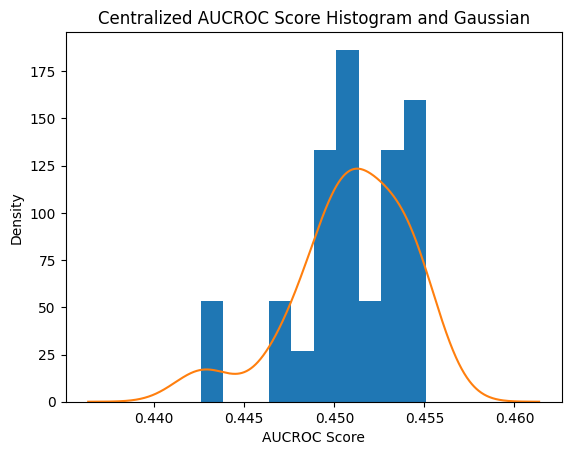

In [51]:
ax = temp_auc_central.value.plot(kind='hist', density=True)
temp_auc_central.value.plot(kind='kde', ax=ax)
ax.set_title('Centralized AUCROC Score Histogram and Gaussian')
ax.set_xlabel('AUCROC Score')

### Calculating Normal Curve Metrics 

[reference1](https://medium.com/@thiago.dejesus0705/assimetria-e-curtose-estat%C3%ADstica-b%C3%A1sica-usando-o-python-7e2d4a753727)

[reference 2](https://www.turing.com/kb/calculating-skewness-and-kurtosis-in-python)

---
[Skewtest Scipy Documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skewtest.html)

[Skew Scipy Documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skew.html)

In [71]:
central_caf = skewtest(temp_auc_central['value'])
print('Z-score:', central_caf.statistic)
print('P Valor:', central_caf.pvalue)

Z-score: -2.352004984305152
P Valor: 0.018672524727474882


In [47]:
caf_value = skew(temp_auc_central['value'])
caf_value

-0.9978176831566947

In [72]:
central_ccf = kurtosis(temp_auc_central['value'])
print('CCF: ', central_ccf)

CCF:  0.8566438184503569


In [73]:
central_n, central_bins = np.histogram(temp_auc_central['value'])
central_mids = 0.5*(central_bins[1:] + central_bins[:-1])
central_mean = np.average(central_mids, weights=central_n)
central_var = np.average((central_mids - central_mean)**2, weights=central_n)
central_std_dev = np.sqrt(central_var)

In [74]:
len(central_mids)==len(central_n)

True

In [75]:
print('Média: ', central_mean)
print('Variância: ', central_var)
print('Desvio Padrão: ', central_std_dev)

Média:  0.4509386718273163
Variância:  9.100253709712926e-06
Desvio Padrão:  0.0030166626774820095


## Federated - Normal curve Metrics for AUCROC Score

### DataFrame from TB logs

In [50]:
temp_auc_fed = pd.DataFrame()

for index in range(44):
    acc = EventAccumulator(
        f'/home/labnet/Documents/JulianaPiaz/quickstart-pytorch-lightning/tb_logs/trial_5c/version_{index}'
    )
    acc.Reload()
    print(index, end='; ')
    if(index not in [21, 23, 29, 33, 34]):
        a = pd.DataFrame(acc.Scalars("test_auc_roc"))
        a['version'] = index
        temp_auc_fed = pd.concat([temp_auc_fed, a])

0; 1; 2; 3; 4; 5; 6; 7; 8; 9; 10; 11; 12; 13; 14; 15; 16; 17; 18; 19; 20; 21; 22; 23; 24; 25; 26; 27; 28; 29; 30; 31; 32; 33; 34; 35; 36; 37; 38; 39; 40; 41; 42; 43; 

In [60]:
temp_auc_fed

,wall_time,step,value,version
0,1.712412e+09,0,0.596543,0
0,1.712412e+09,0,0.508669,1
0,1.712412e+09,0,0.494705,2
1,1.712412e+09,0,0.517512,2
2,1.712412e+09,0,0.495359,2
...,...,...,...,...
0,1.712523e+09,0,0.547653,42
1,1.712523e+09,0,0.547949,42
0,1.712523e+09,0,0.514041,43
1,1.712523e+09,0,0.514779,43


### Normal Curve Plot

Text(0.5, 0, 'AUCROC Score')

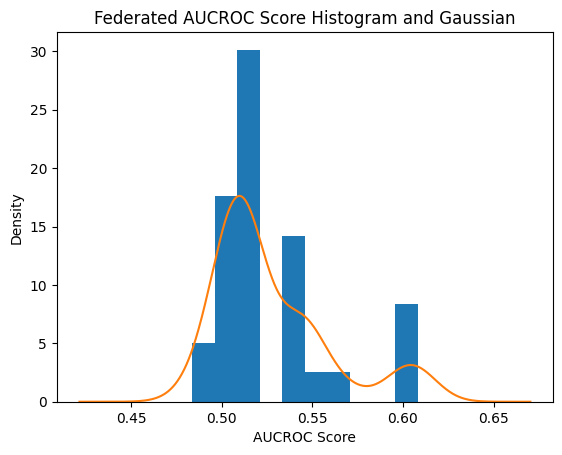

In [59]:
ax = temp_auc_fed.value.plot(kind='hist', density=True)
temp_auc_fed.value.plot(kind='kde', ax=ax)
ax.set_title('Federated AUCROC Score Histogram and Gaussian')
ax.set_xlabel('AUCROC Score')

### Calculating Normal Curve Metrics

In [57]:
federated_caf = skewtest(temp_auc_fed['value'])
print('Z-score:', federated_caf.statistic)
print('P Valor:', federated_caf.pvalue)

Z-score: 4.538025869280704
P Valor: 5.678329595002701e-06


In [61]:
caf_value = skew(temp_auc_fed['value'])
caf_value

1.3224487403322078

In [62]:
federated_ccf = kurtosis(temp_auc_fed['value'])
print('CCF: ', federated_ccf)

CCF:  0.8586006750435433


In [64]:
federated_n, federated_bins = np.histogram(temp_auc_fed['value'])
federated_mids = 0.5*(federated_bins[1:] + federated_bins[:-1])
federated_mean = np.average(federated_mids, weights=federated_n)
federated_var = np.average((federated_mids - federated_mean)**2, weights=federated_n)
federated_std_dev = np.sqrt(federated_var)

In [65]:
len(federated_mids)==len(federated_n)

True

In [66]:
print('Média: ', federated_mean)
print('Variância: ', federated_var)
print('Desvio Padrão: ', federated_std_dev)

Média:  0.5266927247246106
Variância:  0.0009510182822200175
Desvio Padrão:  0.030838584309595303


## Making Pandas DataFrame with Metrics

In [69]:
data = ([[federated_ccf, federated_caf.statistic, federated_mean, federated_var, federated_std_dev], [central_ccf, central_caf.statistic, central_mean, central_var, central_std_dev]]) 
metrics = pd.DataFrame(data, columns=['kurtosis', 'asymmetry', 'mean', 'variance', 'standart_deviation'], index=['federated', 'centralized'])

In [70]:
metrics

,kurtosis,asymmetry,mean,variance,standart_deviation
federated,0.858601,4.538026,0.526693,0.000951,0.030839
centralized,0.856644,-2.352005,0.450939,0.000009,0.003017


In [79]:
metrics.to_csv('aucroc_histogram_metrics.csv', sep=';', index_label='architecture')